<a href="https://colab.research.google.com/github/seismomat/NumericoMio/blob/master/EulerModificadoUnaEcuacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$x(t+h)= x(t) +hf(t+h,x+hf(t,x))$$

O de manera equivalente

$$ x(t+h)=x(t) + F_{2}$$ 

de manera que 

$$F_{1}=hf(t,x)$$
$$ F_{2}=hf(t+h,x+F_{1})$$

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [10]:
f=lambda x,t:x*np.tan(t+3)
x_t=lambda t:1 / np.cos(t+3)

In [11]:
t0=-3; x0=1; h=0.05;M=20;

In [12]:
def EulerMod(M,h,tk,xk):
    x=[];t=[];
    x_exact=[];
    for k in range(M):
        F1=h*f(xk,tk)
        tkp1=tk+h;
        F2=h*f(xk+F1,tkp1);
        xkp1=xk+F2;
        
        
        xk=np.copy(xkp1)
        tk=np.copy(round(tkp1,2))
        
        x.append(xk)
        t.append(tk)
        x_exact.append(x_t(tk))
        
    return x,t,x_exact

In [17]:
x,t,x_exact=EulerMod(M,h,t0,x0)
p=pd.DataFrame({"t":t,"aprox":x,"real":x_exact})
p[:10]

,t,aprox,real
0,-2.95,1.002502085418777,1.001251
1,-2.9,1.0075439550219685,1.005021
2,-2.85,1.0151959200388765,1.011356
3,-2.8,1.0255631955316669,1.020339
4,-2.75,1.0387893681916354,1.032085
5,-2.7,1.055061254429137,1.046752
6,-2.65,1.0746154601926392,1.064540
7,-2.6,1.0977470843925385,1.085704
8,-2.55,1.1248211877072376,1.110559
9,-2.5,1.1562879029076345,1.139494


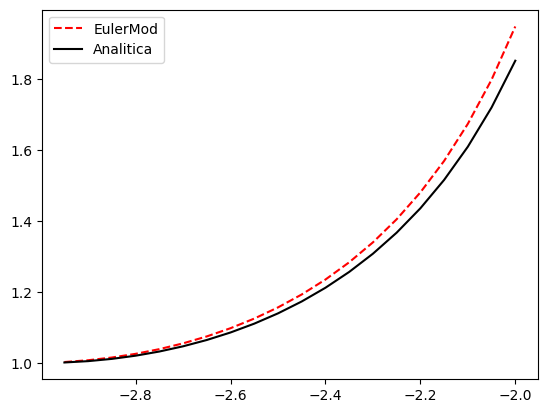

In [18]:
plt.plot(t,x,'--r',label="EulerMod")
plt.plot(t,x_exact,'black',label="Analitica")
plt.legend()